# Analyse de Sentiment Worldcloud des avis laissés Amazon  après l'achat d'un téléphone SAMSUNG
(4915 avis entre 2012 et 2014)

**Importation des packages**

In [1]:
#importer des packages  nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import sklearn
import re

**Pre-Processing des données à exploiter**

In [7]:
#Affichage des 1ières lignes du dataframe
path="C:/Users/miche/OneDrive/Documents/Mes Projets Git hub/Bases projets"
df=pd.read_csv(path+"/amazon_reviews.csv", encoding='unicode_escape')
display(df.head(3))

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0


**Dans le cadre de ce projet, c'est la colonne reviewText qui sera utilisée**



*% de valeurs manquantes*

In [6]:

pd.DataFrame(index=df.columns, columns=['%_valeurs_manquantes'], data= (df.isna().sum().values / len(df)*100))

,%_valeurs_manquantes
Unnamed: 0,0.000000
reviewerName,0.020346
overall,0.000000
reviewText,0.020346
reviewTime,0.000000
day_diff,0.000000
helpful_yes,0.000000
helpful_no,0.000000
total_vote,0.000000
score_pos_neg_diff,0.000000


In [5]:
#suppression des valeurs manquantes
df=df.dropna(axis=0, subset=['reviewText'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4914 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4914 non-null   int64  
 1   reviewerName          4913 non-null   object 
 2   overall               4914 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4914 non-null   object 
 5   day_diff              4914 non-null   int64  
 6   helpful_yes           4914 non-null   int64  
 7   helpful_no            4914 non-null   int64  
 8   total_vote            4914 non-null   int64  
 9   score_pos_neg_diff    4914 non-null   int64  
 10  score_average_rating  4914 non-null   float64
 11  wilson_lower_bound    4914 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 499.1+ KB


In [7]:
df.reviewText=df.reviewText.astype(str)

In [8]:
df.reviewTime= pd.to_datetime(df.reviewTime)

In [9]:
df['year']=df['reviewTime'].dt.year

In [10]:
df.year.value_counts()

year
2013    2678
2014    1736
2012     500
Name: count, dtype: int64

*Découpage des commentaires en mots et le filtrage Stop Words*

---



> Tokenization (Découpage des commentaires en mots)



In [11]:
# Extration des commentaires de la colonne text
text=''
for comment in df.reviewText:
          text+=comment

In [12]:
#créaction d'une fonction pour remplacer les symboles # par un espace
import re
def remove_hastag(chaine):
          r=re.compile(r"#[\w+]")
          chaine= r.sub("", chaine)
          return chaine
remove_hastag(text)

'No issues.Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.it works as expected. I should have sprung for the higher capacity.  I think its made a bit cheesier than the earlier versions; the paint looks not as clean as beforeThis think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I\'ve had this for a few months and have had ZERO issue\'s since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you\'ll get for a nice sd cardIt\'s mini storage.  It doesn\'t

In [13]:
#Découpage des phrase en mots
from nltk.tokenize import TweetTokenizer
tokenizer= TweetTokenizer()
tokens= tokenizer.tokenize(text)

*Découpage des commentaires en mots et le filtrage Stop Words*

---



> Le filtrage Stop Words et affichage du WordCloud

In [14]:
#Dans le cadre de l'analyse de test, nous allons devoir garder les mots utiles
#Identification des mots vides
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miche\AppData\Roaming\nltk_data...


{'they', "shan't", 'who', 'by', "mustn't", 'ain', 'further', 'hasn', 'the', 'after', 'both', 'be', "you're", "wouldn't", 'or', "she's", 'herself', 'not', 'again', "hasn't", 'to', 'shan', 'her', 'into', "it's", 'each', "couldn't", 'in', 'y', 'then', "won't", 'for', 'been', 'here', 'up', 'mustn', 'over', 'because', 'has', 'where', 'no', 'can', 't', 'was', 'it', 'itself', 'is', 'm', 'did', 'an', 'under', 'that', 'were', 'doing', 'its', "didn't", 'out', 'being', 'with', 'those', 'when', 'haven', 'other', "you'll", 'so', "should've", 'd', 'him', "isn't", 'any', 'don', 'few', 'aren', 'while', 'hadn', 'through', 're', 'at', 'theirs', 'why', 'should', 'this', 'than', 'my', 'didn', "needn't", 'off', 'until', "hadn't", "mightn't", "doesn't", "weren't", 'how', 'you', 'all', 'below', 'once', 'doesn', 'during', 'he', 'their', 'ours', 'wasn', 'them', 'what', 'whom', 'most', 'these', "that'll", "wasn't", 'she', 'i', 'me', 's', 'now', 'against', 'have', 'if', 'wouldn', 'very', 'yourselves', 'only', 'b

[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
#Ajout des ponctuations dans la liste des mots vides
stop_words.update(['?', '!', '.', ',',':', ';', '-', '_', '--', '...',"\'", "phone", "one", 'also', 'I'])

In [16]:
#Définition d'une fonction qui permet de retirer des mots vides de notre text
def stop_words_filtering (list):
    tokens=[]
    for mot in list:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens
tokens=stop_words_filtering(tokens)

In [17]:
print(tokens)

['No', 'issues.Purchased', 'device', 'worked', 'advertised', 'You', 'never', 'much', 'memory', 'since', 'download', 'lot', 'stuff', 'brainer', 'me.it', 'works', 'expected', 'sprung', 'higher', 'capacity', 'think', 'made', 'bit', 'cheesier', 'earlier', 'versions', 'paint', 'looks', 'clean', 'beforeThis', 'think', 'worked', 'great.Had', 'diff', 'bran', '64gb', 'card', 'went', 'south', '3', 'months.This', 'held', 'pretty', 'well', 'since', 'S3', 'Note', '3', '*', '*', '*', 'update', '3/21', '/', '14I', 'months', 'ZERO', "issue's", 'since', 'transferred', 'S3', 'Note', '3', 'note', '2', 'This', 'card', 'reliable', 'solid', 'Cheers', 'Bought', 'Retail', 'Packaging', 'arrived', 'legit', 'orange', 'envelope', 'english', 'version', 'asian', 'like', 'picture', 'shows', 'arrived', 'quickly', 'bought', '32', '16', 'retail', 'packaging', 'htc', 'sv', 'Lg', 'Optimus', 'cards', 'working', 'order', 'probably', 'best', 'price', 'get', 'nice', 'sd', "cardIt's", 'mini', 'storage', 'It', 'anything', 'els

In [18]:
#Affichage du nombre total de ligne dans tokens
len(tokens)

136459

Affichage du Nuage de mots

In [19]:
from PIL import ImageTk, Image
from wordcloud import WordCloud
 #le masque
mask = np.array(Image.open("/content/drive/MyDrive/Projet_draft/coeur.png"))

def plot_word_cloud(text, background_color = "white"):
       # le calque du nuage
    wc = WordCloud(background_color=background_color, max_words=1000,
                   stopwords=stop_words, mask = mask,
                   max_font_size=50, random_state=42,
                   collocations = True)
    # affichage du nuage de mots
    plt.figure(figsize= (20,6))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()

plot_word_cloud(text)

ModuleNotFoundError: No module named 'wordcloud'

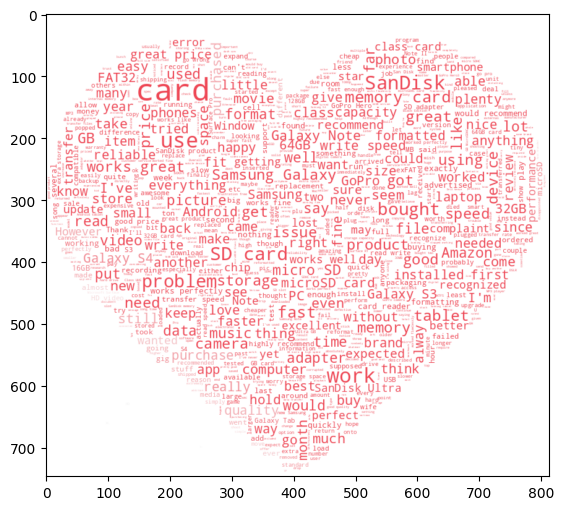

In [ ]:
from wordcloud import ImageColorGenerator
mask = np.array(Image.open("/content/drive/MyDrive/Projet_draft/coeur.png"))
img_color=ImageColorGenerator (mask)

def plot_word_cloud2(text, background_color = "white"):
    #le masque
    # le calque du nuage
    wc= WordCloud(background_color=background_color, max_words=1000,
                   stopwords=stop_words,mask = mask,
                   max_font_size=50, random_state=42,
                   collocations = True)

    # affichage du nuage de mots
    plt.figure(figsize= (10,6))
    wc.generate(text)
    wc.recolor(color_func= img_color)
    plt.imshow(wc, interpolation = 'bilinear')
    plt.show()

plot_word_cloud2(text)

In [ ]:
#voici la question ci-dessous et le code que j'ai commencé en bas ==> kayode

**Modèle ML GradientBohostingClassifier pour l'Analyse de sentiment**

In [ ]:
#Création d'une colonne sentiment, où les scores moyens de 0 >= 0.5 seront négatifs et ceux > à 0.5 seront positifs

df.loc[(df.score_average_rating <0.5) |(df.score_average_rating ==0.5), 'sentiment']=0
df.loc[(df.score_average_rating >0.5), 'sentiment']=1

In [ ]:
df.sentiment=df.sentiment.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
X=df.reviewText
y=df.sentiment
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
X_train=vectorizer.fit_transform(X_train).toarray()
X_test=vectorizer.transform(X_test).toarray()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree= DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt=decision_tree.predict(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting= GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gb=gradient_boosting.predict(X_test)

In [ ]:
#l'accuracy
print('score_modèle décision tree:', gradient_boosting.score(X_test,y_test))
print('score_GradientBoosting:', decision_tree.score(X_test,y_test))

score_modèle décision tree: 0.9206510681586979
score_GradientBoosting: 0.8952187182095626


In [ ]:
#matrice de confusion decision tree
display(pd.crosstab(y_test,y_pred_dt,rownames=['classe reelle'], colnames=['classe predite décision tree']))
display(pd.crosstab(y_test,y_pred_gb,rownames=['classe reelle'], colnames=['classe predite gradientboosting']))


classe predite décision tree,0,1
classe reelle,,
0,870,31
1,72,10


classe predite gradientboosting,0,1
classe reelle,,
0,899,2
1,76,6


In [ ]:
from sklearn.metrics import classification_report
print('Report modèle décision tree')
print(classification_report(y_test, y_pred_dt))
print()
print('Report modèle gradientboosting')
print(classification_report(y_test, y_pred_gb))

Report modèle décision tree
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       901
           1       0.24      0.12      0.16        82

    accuracy                           0.90       983
   macro avg       0.58      0.54      0.55       983
weighted avg       0.87      0.90      0.88       983


Report modèle gradientboosting
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       901
           1       0.75      0.07      0.13        82

    accuracy                           0.92       983
   macro avg       0.84      0.54      0.55       983
weighted avg       0.91      0.92      0.89       983

